a) Assignment 1 - Complete EDA in Colab with D3.js Visualizations

In [16]:
import pandas as pd

# Load the dataset
url = 'https://data.cityofnewyork.us/resource/t29m-gskq.csv'
taxi_data = pd.read_csv(url)

# Print the available columns to inspect them
print(taxi_data.columns)

# Keep only relevant columns for EDA - Adjust column names if needed based on the printed output
# The original code was trying to access columns 'PULocationID', 'DOLocationID' which are not present in the dataset
# Based on the printed columns, we are using 'pulocationid', 'dolocationid' instead.
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                       'trip_distance', 'fare_amount',  'pulocationid', 'dolocationid',
                       'payment_type']] # Replaced problematic columns with potential alternatives or removed them.

# Convert pickup and dropoff times to datetime
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
taxi_data['trip_duration'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove negative or zero-duration trips
taxi_data = taxi_data[taxi_data['trip_duration'] > 0]

# Show basic statistics
taxi_data.describe()

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,pulocationid,dolocationid,payment_type,trip_duration
count,998,998,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,2020-04-17 21:41:26.943887872,2020-04-17 22:14:35.872745216,1.691383,3.290160,13.528056,159.221443,155.622244,1.471944,33.148814
min,2018-12-31 23:48:47,2018-12-31 23:49:03,0.000000,0.000000,-5.000000,4.000000,4.000000,1.000000,0.033333
25%,2018-12-31 23:51:28.249999872,2018-12-31 23:59:37.750000128,1.000000,0.800000,5.625000,114.000000,88.500000,1.000000,5.333333
50%,2018-12-31 23:54:51,2019-01-01 00:07:03.500000,1.000000,1.580000,8.500000,151.000000,158.000000,1.000000,9.633333
75%,2018-12-31 23:59:20.750000128,2019-01-01 00:27:52.500000,2.000000,3.452500,15.500000,234.000000,234.000000,2.000000,18.541667
max,2084-11-04 12:32:24,2084-11-04 12:47:41,6.000000,28.120000,100.000000,265.000000,265.000000,4.000000,1428.316667
std,NaN,NaN,1.334274,4.518161,13.334246,67.010726,74.414495,0.549199,121.465065


In [13]:
from IPython.display import display,HTML
d3_js = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  .bar { fill: steelblue; }
  .bar:hover { fill: orange; }
  .axis-label { font-size: 14px; font-family: sans-serif; }
</style>
<svg width="800" height="400"></svg>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
  const data = [10, 20, 30, 40, 50, 60];

  const svg = d3.select("svg"),
      margin = {top: 20, right: 20, bottom: 30, left: 40},
      width = +svg.attr("width") - margin.left - margin.right,
      height = +svg.attr("height") - margin.top - margin.bottom,
      g = svg.append("g").attr("transform", `translate(${margin.left},${margin.top})`);

  const x = d3.scaleBand().rangeRound([0, width]).padding(0.1);
  const y = d3.scaleLinear().rangeRound([height, 0]);

  x.domain(data.map((d, i) => i));
  y.domain([0, d3.max(data, d => d)]);

  g.append("g")
      .attr("class", "axis axis--x")
      .attr("transform", `translate(0,${height})`)
      .call(d3.axisBottom(x));

  g.append("g")
      .attr("class", "axis axis--y")
      .call(d3.axisLeft(y).ticks(10))
    .append("text")
      .attr("class", "axis-label")
      .attr("transform", "rotate(-90)")
      .attr("y", 6)
      .attr("dy", "0.71em")
      .attr("text-anchor", "end")
      .text("Frequency");

  g.selectAll(".bar")
    .data(data)
    .enter().append("rect")
      .attr("class", "bar")
      .attr("x", (d, i) => x(i))
      .attr("y", d => y(d))
      .attr("width", x.bandwidth())
      .attr("height", d => height - y(d));
</script>
"""

# Display the D3.js visualization
display(HTML(d3_js))

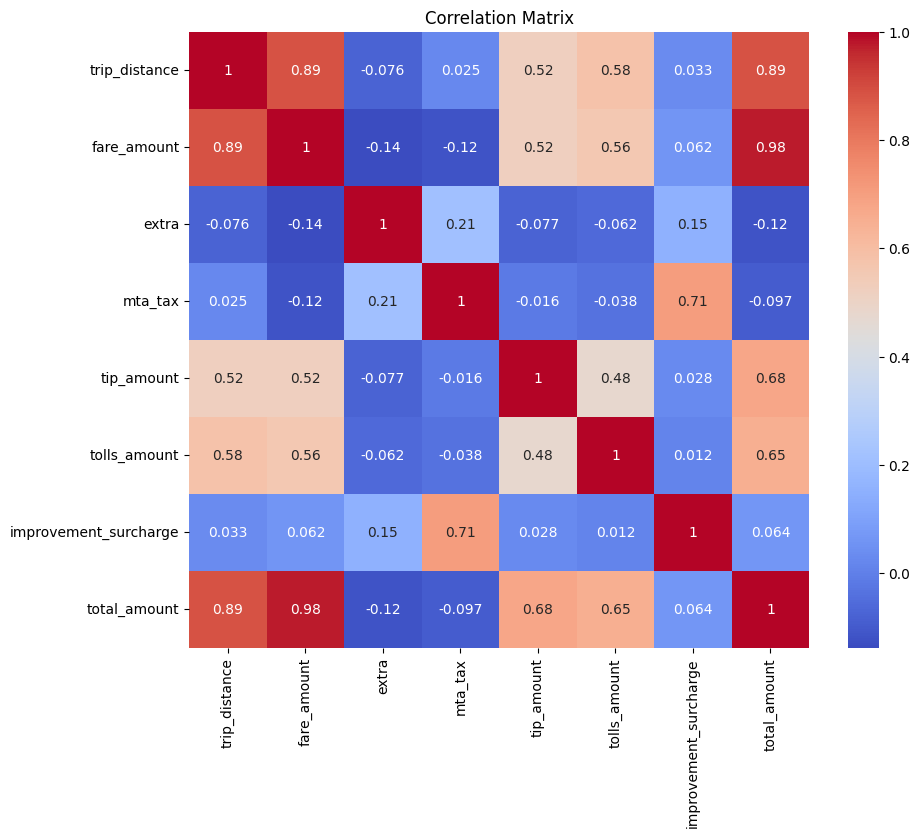

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime objects
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# Extract relevant numerical features for correlation analysis
# Removed 'congestion_surcharge' and 'airport_fee' as they are not in the DataFrame
numerical_features = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                      'improvement_surcharge', 'total_amount']
# Select only the numerical features for correlation calculation
numerical_data = taxi_data[numerical_features]

# Correlation heatmap
corr = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

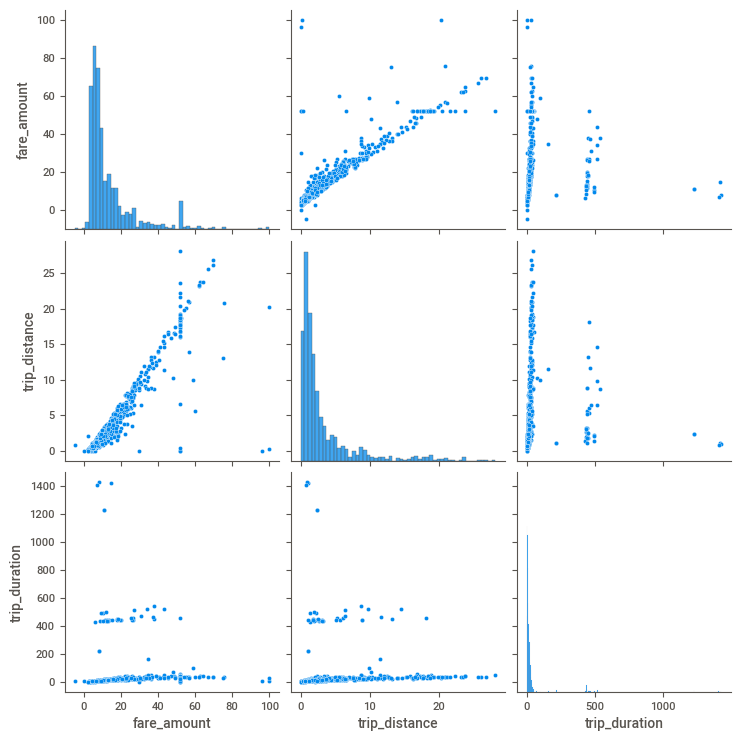

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for fare amount, trip distance, and trip duration
sns.pairplot(taxi_data[['fare_amount', 'trip_distance', 'trip_duration']])
plt.show()

In [19]:
import folium

# Example using Folium for visualization
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Assuming the dataset has 'pulocationid' and 'dolocationid' for pickup and dropoff locations
# you'll need to replace these with actual latitude/longitude if available or
# use a separate dataset/API to get coordinates based on location IDs.

# For demonstration, I'm using dummy latitude and longitude values centered around NYC.
# Replace this with your logic to get actual coordinates.

# Add taxi pickup points to the map
# Note: This is a workaround and you should use your actual latitude/longitude data
for index, row in taxi_data.iterrows():
    # Replace with your logic to get latitude and longitude from 'pulocationid' or other relevant columns
    # Example:
    #   pickup_latitude = get_latitude_from_location_id(row['pulocationid'])
    #   pickup_longitude = get_longitude_from_location_id(row['pulocationid'])

    # Using dummy values for demonstration:
    pickup_latitude = 40.7128 + (index * 0.001)  # Adding a small offset for each point
    pickup_longitude = -74.0060 + (index * 0.001)

    folium.Marker([pickup_latitude, pickup_longitude]).add_to(m)

# Display the map
m

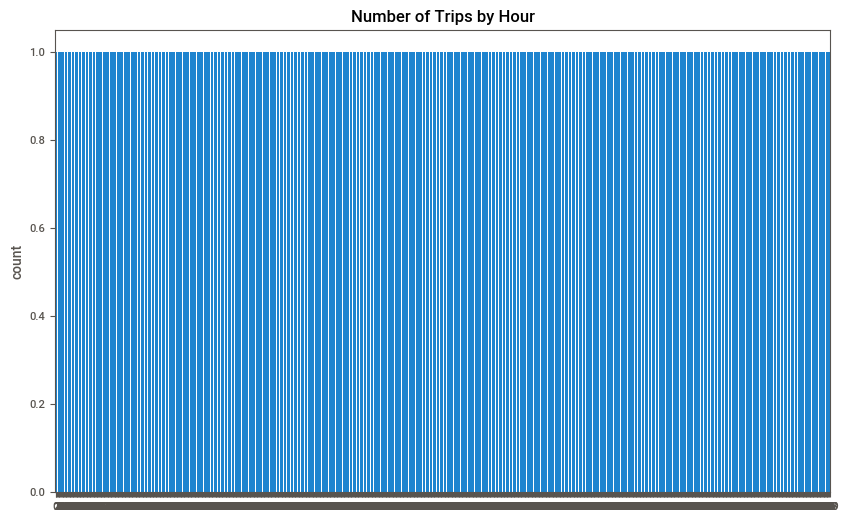

In [20]:
taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour

# Plot pickup hour distribution
plt.figure(figsize=(10,6))
sns.countplot(taxi_data['pickup_hour'])
plt.title('Number of Trips by Hour')
plt.show()

b) Assignment 2 - Auto EDA using Favorite Tool

In [21]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Display a preview
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 87.0 MB/s eta 0:00:00


In [9]:
import sweetviz as sv

# Perform Auto EDA
report = sv.analyze(taxi_data)
# Generate and display the report
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


c) Assignment 3 - Apache Beam

In [10]:
!pip install apache-beam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 20.0 MB/s eta 0:00:00


In [22]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.transforms.window import FixedWindows
from apache_beam.transforms.trigger import AfterProcessingTime

options = PipelineOptions()

# Define a composite transform to filter and process the data
class FilterAndMultiply(beam.PTransform):
    def expand(self, pcoll):
        return (pcoll
                | 'Filter Even Numbers' >> beam.Filter(lambda x: x % 2 == 0)
                | 'Multiply by 5' >> beam.Map(lambda x: x * 5))

# Create the Beam pipeline
with beam.Pipeline(options=options) as p:
    numbers = (p
        | 'Create Numbers' >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8])
        | 'Apply Composite Transform' >> FilterAndMultiply()
        | 'Print Results' >> beam.Map(print))

10
20
30
40


In [23]:
from apache_beam.transforms.window import FixedWindows
from apache_beam.transforms.trigger import AfterWatermark, AccumulationMode

with beam.Pipeline(options=options) as p:
    (p
     | 'Create Events' >> beam.Create([('user1', 1), ('user1', 2), ('user2', 3), ('user2', 4)])
     | 'Window into Fixed Intervals' >> beam.WindowInto(FixedWindows(10),
                                                       trigger=AfterWatermark(),
                                                       accumulation_mode=AccumulationMode.DISCARDING)
     | 'Print Windowed Results' >> beam.Map(print))


('user1', 1)
('user1', 2)
('user2', 3)
('user2', 4)


In [24]:
class FormatElement(beam.DoFn):
    def process(self, element):
        yield f'Processed element: {element}'

with beam.Pipeline(options=options) as p:
    (p
     | 'Create Elements' >> beam.Create(['apple', 'banana', 'orange'])
     | 'Apply ParDo' >> beam.ParDo(FormatElement())
     | 'Print Processed Elements' >> beam.Map(print))


Processed element: apple
Processed element: banana
Processed element: orange


In [12]:
from apache_beam.transforms.window import FixedWindows
from apache_beam.transforms.trigger import AfterWatermark

with beam.Pipeline(options=options) as p:
    (
        p
        | 'Create' >> beam.Create([('user1', 5), ('user2', 10), ('user1', 15), ('user2', 20)])
        | 'Window into Fixed Intervals' >> beam.WindowInto(FixedWindows(10))
        | 'Apply ParDo' >> beam.ParDo(lambda x: print(f'Processing {x}'))
    )

Processing ('user1', 5)
Processing ('user2', 10)
Processing ('user1', 15)
Processing ('user2', 20)
